In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv("Result_final_3.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 24 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Unnamed: 0                         int64 
 1   MandatId                           int64 
 2   DateCreation                       object
 3   BienMandatId                       int64 
 4   Statut                             int64 
 5   DescriptionBien_DateOffreAcceptee  object
 6   Origine_DateCollecte               object
 7   CritereId                          int64 
 8   SurfaceMin                         int64 
 9   NombrePiecesEnum                   int64 
 10  NombreChambresEnum                 int64 
 11  Departement_LocalisationId         int64 
 12  Region_LocalisationId              int64 
 13  LocalisationId                     int64 
 14  StatutMandat                       int64 
 15  TypeMission                        int64 
 16  TypeBien                           i

In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,1,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,1,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,1,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,1,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,1,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [ ]:
df['TypeProjet'].value_counts()

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull() , 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [ ]:
plot = df['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

In [ ]:
print("Nombre de lignes dupliquées", df.duplicated().sum())

In [ ]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count
for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%') 

In [ ]:
plt.figure(figsize = (25,15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
plt.figure(figsize = (15,8))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, 
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Selection des features

In [6]:
X =df[["BudgetMaxEuro", 'SurfaceMin','NombrePiecesEnum',
       'NombreChambresEnum',
       'TypeMission', 'TypeBien', 'TypeProjet',
       'CodePostal']]

In [7]:
X.columns

Index(['BudgetMaxEuro', 'SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum',
       'TypeMission', 'TypeBien', 'TypeProjet', 'CodePostal'],
      dtype='object')

In [8]:
y = df['Succes']

## Division du dataset :  entrainement + test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Normalisation des données

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning

### Regression logistique 

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [12]:
y_lr = lr.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.63      0.99      0.77    272997
Succès (Class 1)       0.32      0.00      0.01    162818

        accuracy                           0.62    435815
       macro avg       0.47      0.50      0.39    435815
    weighted avg       0.51      0.62      0.48    435815



<AxesSubplot:>

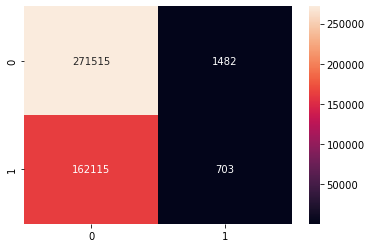

In [14]:
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

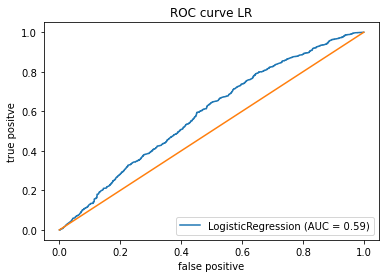

In [15]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

# Grid Search cv Regression Logistique 

In [16]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'newton-cg')
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=5)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [17]:
print(lr_gs.best_params_)
y_lr_gs = lr_gs.predict(X_test)

{'C': 0.001, 'penalty': 'l2'}


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr_gs, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.63      0.99      0.77    272997
succès (Class 1)       0.33      0.00      0.01    162818

        accuracy                           0.62    435815
       macro avg       0.48      0.50      0.39    435815
    weighted avg       0.51      0.62      0.48    435815



# Xgboost Classifier

In [19]:
#import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb, target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.88      0.94      0.91    272997
succès (Class 1)       0.89      0.79      0.84    162818

        accuracy                           0.88    435815
       macro avg       0.89      0.87      0.87    435815
    weighted avg       0.89      0.88      0.88    435815



<AxesSubplot:>

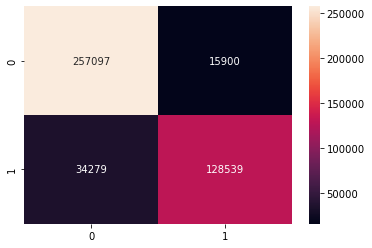

In [21]:
cm = confusion_matrix(y_test,xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d") 

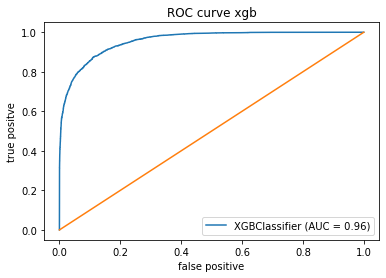

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve xgb')
plt.show()